In [0]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from fbprophet import Prophet

In [0]:
df = pd.read_csv('Data\Bike_Sharing_Demand.csv',parse_dates = True)

In [8]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [0]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})

In [0]:
validate = df[['ds','y','season','holiday','weather','temp','humidity','windspeed']].tail(48)

In [0]:
df.drop(df[['ds','y','season','holiday','weather','temp','humidity','windspeed']].tail(48).index,inplace=True)

In [0]:
train = df[['ds','y','season','holiday','weather','temp','humidity','windspeed']]

In [18]:
m = Prophet( yearly_seasonality=True)
m.add_regressor('season')
m.add_regressor('holiday')
m.add_regressor('weather')
m.add_regressor('temp')
m.add_regressor('humidity')
m.add_regressor('windspeed')

In [19]:
m.fit(train)

In [0]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

In [0]:
future['season'] = validate['season'].values 
future['holiday'] = validate['holiday'].values 
future['weather'] =  validate['weather'].values
future['temp'] = validate['temp'].values 
future['humidity'] =  validate['humidity'].values
future['windspeed'] = validate['windspeed'].values 

In [0]:
forecast = m.predict(future)

In [24]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,holiday,holiday_lower,holiday_upper,humidity,humidity_lower,humidity_upper,season,season_lower,season_upper,temp,temp_lower,temp_upper,weather,weather_lower,weather_upper,weekly,weekly_lower,weekly_upper,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-18 00:00:00,277.736429,-43.295341,228.751824,277.736429,277.736429,-186.466115,-186.466115,-186.466115,-101.197093,-101.197093,-101.197093,-79.699383,-79.699383,-79.699383,0.0,0.0,0.0,-25.904706,-25.904706,-25.904706,-30.264795,-30.264795,-30.264795,-11.221534,-11.221534,-11.221534,-14.514516,-14.514516,-14.514516,-1.823775,-1.823775,-1.823775,2.206169,2.206169,2.206169,-3.745863,-3.745863,-3.745863,0.0,0.0,0.0,91.270314
1,2012-12-18 01:00:00,277.746620,-50.544119,221.097505,277.746620,277.746620,-201.473738,-201.473738,-201.473738,-116.643145,-116.643145,-116.643145,-79.699383,-79.699383,-79.699383,0.0,0.0,0.0,-25.904706,-25.904706,-25.904706,-30.264795,-30.264795,-30.264795,-11.221534,-11.221534,-11.221534,-14.514516,-14.514516,-14.514516,-1.232764,-1.232764,-1.232764,2.206169,2.206169,2.206169,-3.898446,-3.898446,-3.898446,0.0,0.0,0.0,76.272883
2,2012-12-18 02:00:00,277.756812,-115.653932,174.265114,277.756812,277.756812,-241.065840,-241.065840,-241.065840,-157.977241,-157.977241,-157.977241,-78.348506,-78.348506,-78.348506,0.0,0.0,0.0,-21.066546,-21.066546,-21.066546,-30.264795,-30.264795,-30.264795,-11.221534,-11.221534,-11.221534,-14.514516,-14.514516,-14.514516,-0.688780,-0.688780,-0.688780,-1.281114,-1.281114,-1.281114,-4.051313,-4.051313,-4.051313,0.0,0.0,0.0,36.690972
3,2012-12-18 03:00:00,277.767003,-122.004827,153.155339,277.767003,277.767003,-257.273634,-257.273634,-257.273634,-196.548495,-196.548495,-196.548495,-56.325609,-56.325609,-56.325609,0.0,0.0,0.0,-21.066546,-21.066546,-21.066546,-30.264795,-30.264795,-30.264795,-15.379590,-15.379590,-15.379590,10.502711,10.502711,10.502711,-0.195070,-0.195070,-0.195070,-0.117389,-0.117389,-0.117389,-4.204461,-4.204461,-4.204461,0.0,0.0,0.0,20.493368
4,2012-12-18 04:00:00,277.777194,-96.417919,169.817303,277.777194,277.777194,-246.781619,-246.781619,-246.781619,-192.341878,-192.341878,-192.341878,-50.327616,-50.327616,-50.327616,0.0,0.0,0.0,-16.228386,-16.228386,-16.228386,-30.264795,-30.264795,-30.264795,-15.379590,-15.379590,-15.379590,10.502711,10.502711,10.502711,0.245762,0.245762,0.245762,1.042444,1.042444,1.042444,-4.357887,-4.357887,-4.357887,0.0,0.0,0.0,30.995575


In [25]:
timeseries_evaluation_metrics_func(validate.y,forecast.yhat)

MSE is : 10526.397825382928
MAE is : 66.73451882424882
RMSE is : 102.59823500130462
MAPE is : 115.03252471019137
R2 is : 0.6822627187339608



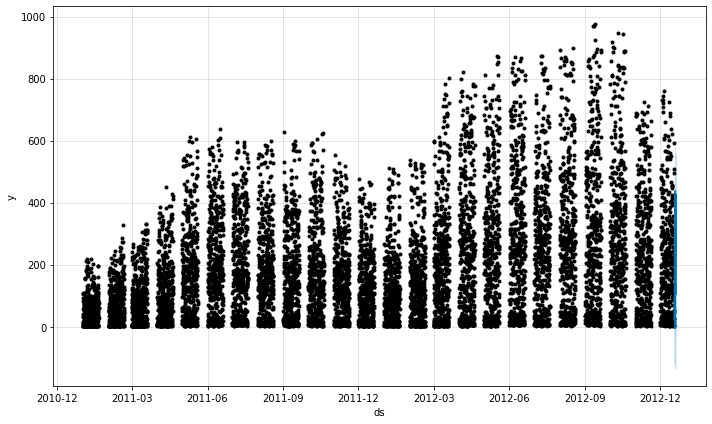

In [26]:
fig1 = m.plot(forecast)

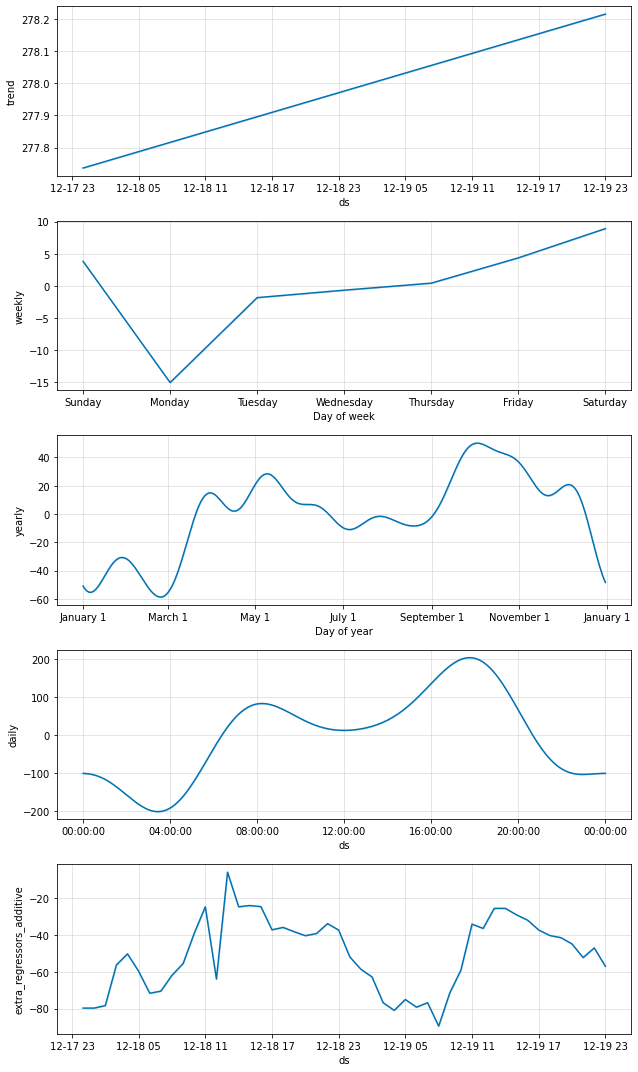

In [27]:
fig2 = m.plot_components(forecast)

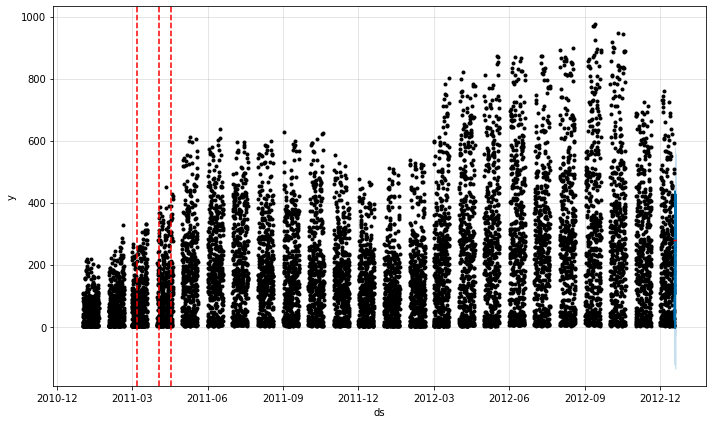

In [28]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)